<a href="https://colab.research.google.com/github/vishu17935/Neural-Networks-for-Handwritten-Digit-Recognition-Multiclass/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Choose strategy: mean, median, most_frequent, constant
#plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    g = np.exp(z)
    a = g / np.sum(g)
    return a

z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# Load your new dataset with 1784 pixels per image
# X, y = load_new_data()  # Replace this with the actual function to load your new dataset
# For demonstration purposes, assuming X and y are loaded correctly
path = '/content/ninja.csv'

# Load the dataset
X = pd.read_csv(path, skiprows=1)
X = X.iloc[1:].reset_index(drop=True)

y = X.iloc[:, 0].values
X = X.drop(X.columns[0], axis=1)
X=X/255.0
X = imputer.fit_transform(X)
m, n = X.shape

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [56]:
print(m,n)

19503 784


In [57]:
print(X)
#print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (19503, 784)
The shape of y is: (19503,)


In [59]:

tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.Input(shape=(784,)),
        Dense(25,activation='relu',name='V'),
        Dense(15,activation='relu',name='I'),
        Dense(10,activation='linear',name='S'),



        ### END CODE HERE ###
    ], name = "my_model"
)

In [60]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 V (Dense)                   (None, 25)                19625     
                                                                 
 I (Dense)                   (None, 15)                390       
                                                                 
 S (Dense)                   (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
[layer1, layer2, layer3] = model.layers

In [62]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [63]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
610/610 [==============================] - 2s 2ms/step - loss: 0.6938
Epoch 2/40
610/610 [==============================] - 1s 2ms/step - loss: 0.3149
Epoch 3/40
610/610 [==============================] - 2s 3ms/step - loss: 0.2519
Epoch 4/40
610/610 [==============================] - 2s 3ms/step - loss: 0.2156
Epoch 5/40
610/610 [==============================] - 1s 2ms/step - loss: 0.1930
Epoch 6/40
610/610 [==============================] - 1s 2ms/step - loss: 0.1715
Epoch 7/40
610/610 [==============================] - 1s 2ms/step - loss: 0.1582
Epoch 8/40
610/610 [==============================] - 1s 2ms/step - loss: 0.1417
Epoch 9/40
610/610 [==============================] - 1s 2ms/step - loss: 0.1342
Epoch 10/40
610/610 [==============================] - 1s 2ms/step - loss: 0.1231
Epoch 11/40
610/610 [==============================] - 1s 2ms/step - loss: 0.1137
Epoch 12/40
610/610 [==============================] - 2s 3ms/step - loss: 0.1062
Epoch 13/40
610/610 [====

In [66]:
def display_digit(pixel_array):
    # Reshape the 1D array (784,) into a 2D array (28, 28)
    image = np.reshape(pixel_array, (28, 28))

    # Display the image
    plt.figure(figsize=(3, 3))  # Adjust the figure size as needed
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()

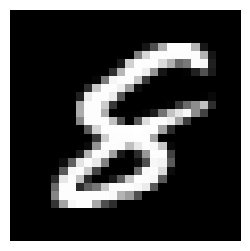

1/1 [==============================] - 0s 39ms/step
 predicting a Two: 
[[-14.4  -13.89   4.24  -8.31 -15.22   1.98   2.15 -19.02  10.45 -10.41]]
 Largest Prediction index: 8


In [71]:
image_of_two = X[1014]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,784))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [72]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.62e-11 2.67e-11 2.00e-03 7.08e-09 7.05e-12 2.09e-04 2.48e-04 1.58e-13
  9.98e-01 8.66e-10]]
Total of predictions: 1.000


In [73]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 8
